### Logistic Regression for SUV Purchase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("suv_dataset.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

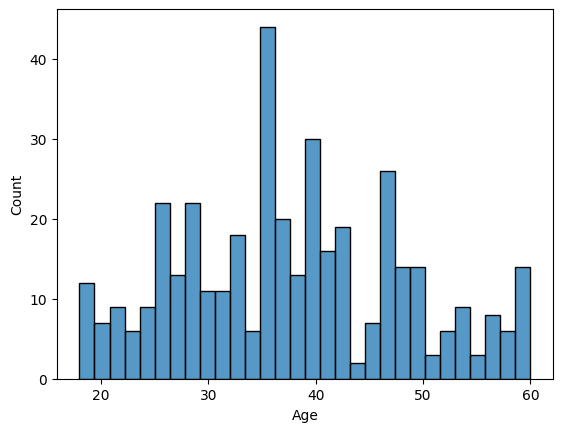

In [4]:
sns.histplot(x='Age',bins=30,data=df)

<Axes: xlabel='Gender', ylabel='count'>

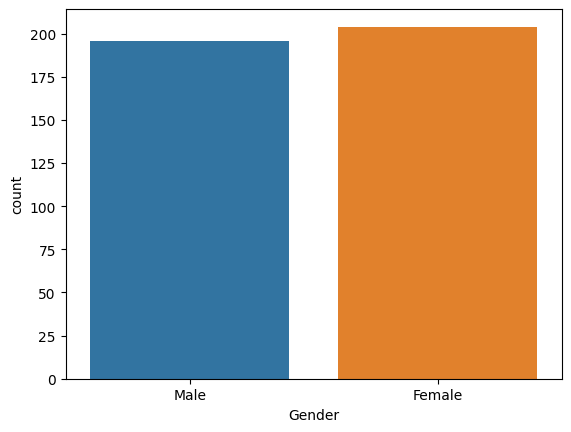

In [5]:
sns.countplot(x="Gender",data=df)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

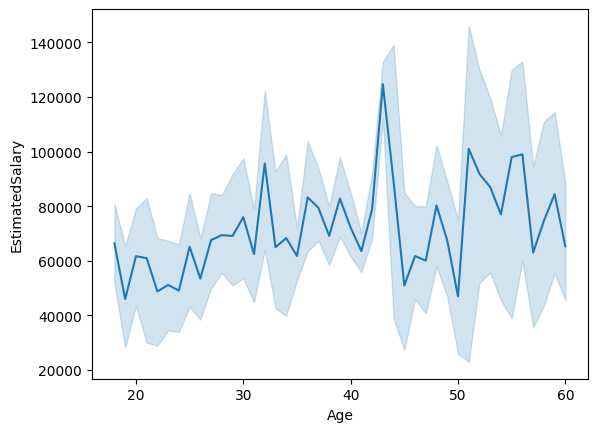

In [7]:
sns.lineplot(x="Age",y="EstimatedSalary",data=df)

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

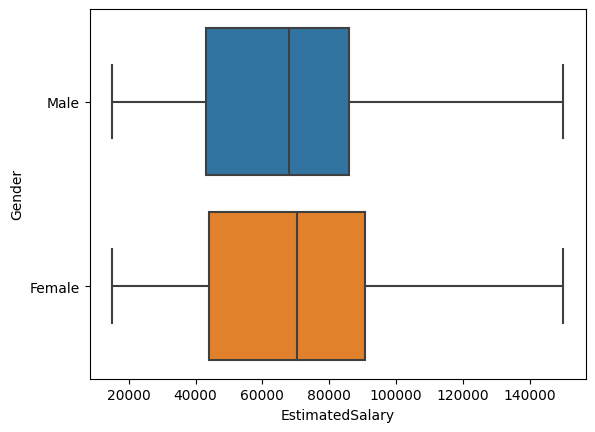

In [8]:
sns.boxplot(x="EstimatedSalary",y="Gender",data=df)

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
gen = pd.get_dummies(df.Gender,drop_first=True,dtype=int)
gen.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [12]:
df1 = pd.concat([df,gen],axis=1)
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [13]:
df1.drop(['Gender','User ID'],axis=1,inplace=True)
df1.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df1.drop('Purchased',axis=1)
y = df1.Purchased

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=10)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [18]:
# The salary cloumn has very large values as compare to other data so we need to scale these values for better model

from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_test.dtype

dtype('int64')

In [25]:
## need to convert to same datatype
y_pred = y_pred.astype("int")

In [26]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1Score: ",f1_score(y_test,y_pred))

Accuracy:  70.0
Recall:  0.14285714285714285
Precision:  1.0
F1Score:  0.25


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [28]:
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [24,  4]], dtype=int64)

In [29]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81        52\n           1       1.00      0.14      0.25        28\n\n    accuracy                           0.70        80\n   macro avg       0.84      0.57      0.53        80\nweighted avg       0.79      0.70      0.62        80\n'